Example notebook to showcase the use of the eccDefinition module. Please do not commit your local changes

In [1]:
import sys
sys.path.append("../src/")

In [2]:
from eccDefinitionUsingFrequency import eccDefinitionUsingFrequency
from eccDefinitionUsingAmplitude import eccDefinitionUsingAmplitude
from eccDefinitionUsingResidualAmplitude import eccDefinitionUsingResidualAmplitude
from measureEccentricity import measure_eccentricity

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from utils import generate_waveform

In [5]:
phi_ref = 0
inclination = 0
t, h = generate_waveform(approximant="EccentricTD",
                                  q=1.0,
                                  chi1=[0.0, 0.0, 0.0],
                                  chi2=[0.0, 0.0, 0.0],
                                  deltaTOverM=0.1,
                                  Momega0=0.01,
                                  eccentricity=0.1,
                                  phi_ref=phi_ref,
                                  inclination=inclination)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import gwtools

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


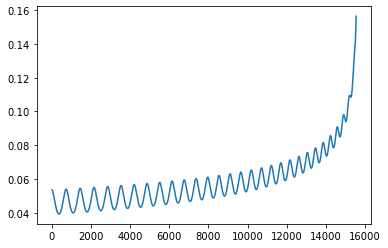

In [7]:
plt.plot(t, np.abs(h))

In [8]:
ylm = gwtools.harmonics.sYlm(-2, 2, 2, inclination, phi_ref)
ylm

(0.6307831305050401+0j)

In [9]:
mode_dict = {(2, 2): h / ylm}

In [10]:
dataDict = {"t": t, "hlm": mode_dict}

### Measure eccentricity using frequency

In [11]:
eccFreq = eccDefinitionUsingFrequency(dataDict)

In [12]:
eccFreq.measure_ecc(t_ref=-14000)

(0.10902184622959549, 0.4416721559400854)

#### Can also use the following function and choose a method

In [13]:
measure_eccentricity(t_ref=-14000, method="Frequency", dataDict=dataDict)

(0.10902184622959549, 0.4416721559400854)

In [14]:
eccFreq.t

array([-15500.11916323, -15500.01916323, -15499.91916323, ...,
           39.98083677,     40.08083677,     40.18083677])

In [15]:
ts = np.arange(-14000, -4000, 10)

In [16]:
ecc = eccFreq.measure_ecc(t_ref=ts)

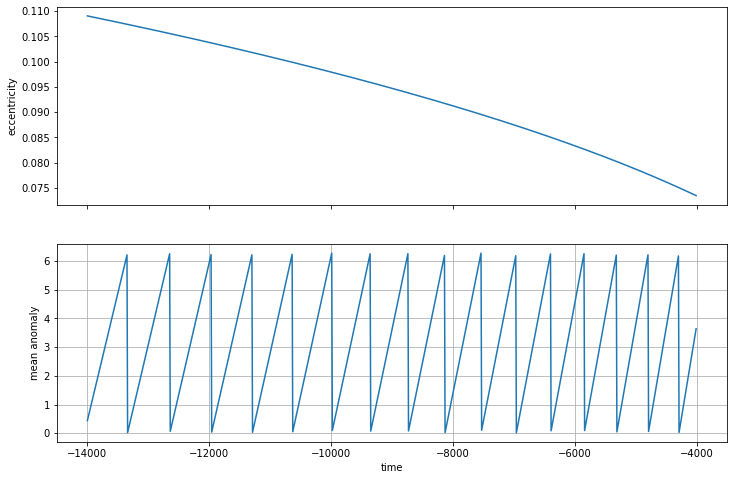

In [17]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
ax[0].plot(ts, eccFreq.measure_ecc(t_ref=ts)[0])
ax[1].plot(ts, eccFreq.measure_ecc(t_ref=ts)[1])

ax[1].set_xlabel("time")
ax[0].set_ylabel("eccentricity")
ax[1].set_ylabel("mean anomaly")
ax[1].grid()

Text(0, 0.5, 'omega_22')

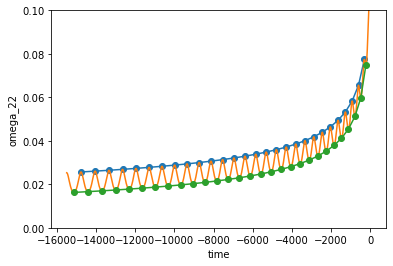

In [18]:
plt.plot(eccFreq.t[eccFreq.find_extrema()], eccFreq.omega22[eccFreq.find_extrema()], marker="o")
plt.plot(eccFreq.t, eccFreq.omega22)
plt.plot(eccFreq.t[eccFreq.find_extrema("minima")], eccFreq.omega22[eccFreq.find_extrema("minima")], marker="o")
plt.ylim(0, 0.1)
plt.xlabel("time")
plt.ylabel("omega_22")

### measuring eccentricity using amplitude

In [19]:
eccAmp = eccDefinitionUsingAmplitude(dataDict)

getting data


In [20]:
eccAmp.measure_ecc(t_ref=-1000), eccFreq.measure_ecc(t_ref=-1000)

((0.0473395556069968, 4.8770621591109835),
 (0.04759874665329759, 4.917542798208003))

Again, we can use the measureEccentricity.py script and select method=Amplitude

In [21]:
measure_eccentricity(t_ref=-1000, dataDict=dataDict, method="Amplitude")

getting data


(0.0473395556069968, 4.8770621591109835)

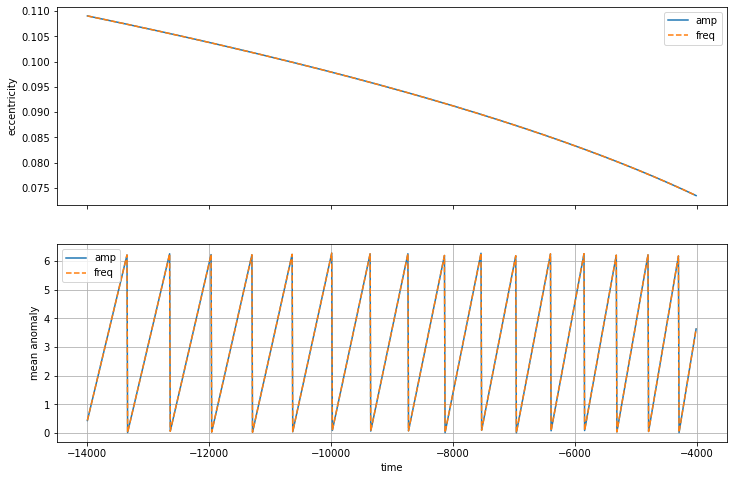

In [22]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
ax[0].plot(ts, eccAmp.measure_ecc(t_ref=ts)[0], label="amp")
ax[1].plot(ts, eccAmp.measure_ecc(t_ref=ts)[1], label="amp")

ax[0].plot(ts, eccFreq.measure_ecc(t_ref=ts)[0], label="freq", ls="--")
ax[1].plot(ts, eccFreq.measure_ecc(t_ref=ts)[1], label="freq", ls="--")

ax[1].set_xlabel("time")
ax[0].set_ylabel("eccentricity")
ax[1].set_ylabel("mean anomaly")
ax[1].grid()
ax[0].legend()
ax[1].legend()

### measuring eccentricity with residual amplitude

In [23]:
t0, h0 = generate_waveform(approximant="EccentricTD",
                                  q=1.0,
                                  chi1=[0.0, 0.0, 0.0],
                                  chi2=[0.0, 0.0, 0.0],
                                  deltaTOverM=0.1,
                                  Momega0=0.01,
                                  eccentricity=1e-5)

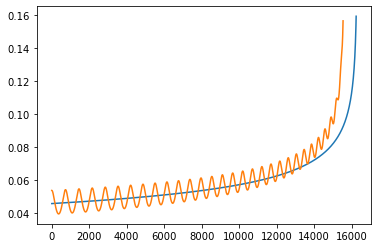

In [24]:
plt.plot(t0, np.abs(h0))
plt.plot(t, np.abs(h))

In [25]:
mode_dict_cir = {(2, 2): h0 / ylm}

In [26]:
dataDict.update({"t_zeroecc": t0, "hlm_zeroecc": mode_dict_cir})

In [27]:
eccResAmp = eccDefinitionUsingResidualAmplitude(dataDict)

In [28]:
eccAmp.measure_ecc(t_ref=-4000), eccFreq.measure_ecc(t_ref=-4000), eccResAmp.measure_ecc(t_ref=-4000)

((0.07344296388049343, 3.7637011400652045),
 (0.07344426397639066, 3.7701586789215042),
 (0.07352721115068653, 3.7996233781168005))

In [29]:
eccResAmp.measure_ecc(t_ref=-1000)

(0.04877338329594688, 5.0468423582039454)

In [30]:
eccResAmp.measure_ecc(t_ref=-14000)

(0.10903408208311308, 0.4479538258080348)

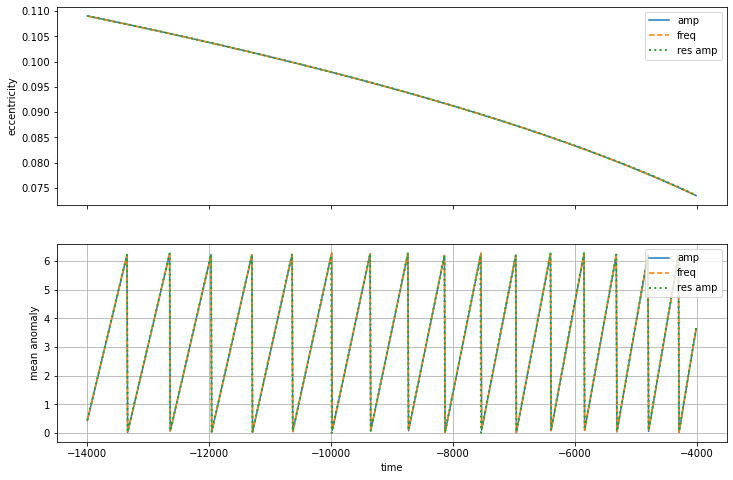

In [31]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
ax[0].plot(ts, eccAmp.measure_ecc(t_ref=ts)[0], label="amp")
ax[1].plot(ts, eccAmp.measure_ecc(t_ref=ts)[1], label="amp")

ax[0].plot(ts, eccFreq.measure_ecc(t_ref=ts)[0], label="freq", ls="--")
ax[1].plot(ts, eccFreq.measure_ecc(t_ref=ts)[1], label="freq", ls="--")

ax[0].plot(ts, eccResAmp.measure_ecc(t_ref=ts)[0], label="res amp", ls=":", lw=2)
ax[1].plot(ts, eccResAmp.measure_ecc(t_ref=ts)[1], label="res amp", ls=":", lw=2)

ax[1].set_xlabel("time")
ax[0].set_ylabel("eccentricity")
ax[1].set_ylabel("mean anomaly")
ax[1].grid()
ax[0].legend()
ax[1].legend()

In [32]:
from measureEccentricity import get_available_methods

In [33]:
get_available_methods()

{'Amplitude': eccDefinitionUsingAmplitude.eccDefinitionUsingAmplitude,
 'Frequency': eccDefinitionUsingFrequency.eccDefinitionUsingFrequency,
 'ResidualAmplitude': eccDefinitionUsingResidualAmplitude.eccDefinitionUsingResidualAmplitude,
 'FrequencyFits': eccDefinitionUsingFrequencyFits.eccDefinitionUsingFrequencyFits}

In [34]:
eccResAmp.res_amp22

array([0.01189351, 0.01189349, 0.01189345, ..., 0.00264385, 0.00265675,
       0.00266973])

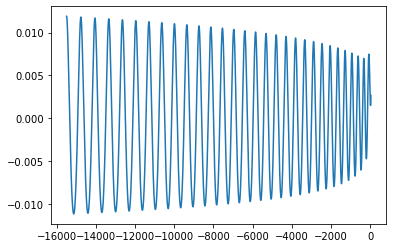

In [35]:
plt.plot(eccResAmp.t, eccResAmp.res_amp22)